In [2]:
from IPython.display import Image
import napari
from napari.utils.notebook_display import nbscreenshot
import warnings
warnings.filterwarnings("ignore")

from napari_roidynamics._widget import RoidynamicsforNapari

viewer=napari.Viewer()
widget = RoidynamicsforNapari(napari_viewer=viewer)
viewer.window.add_dock_widget(widget=widget)

napari.manifest -> 'napari-splitmask-testAna' could not be imported: Cannot find module 'napari_splitmask_testana' declared in entrypoint: 'napari_splitmask_testana:napari.yaml'


# Step-by-step guide
7 steps are necessary to perform intensity measurements with the napari-roidynamics plugin.Although the steps are self-explanatory, here you can find some important considerations for each step of the analysis.

To start using napari-roidynamics activate the environment containing the napari-roidynamics installation and open a napari GUI by typing napari in the terminal. In the GUI open the Plugins/napari-roidynamics.

*In the example below I have called the environment 'roidynamics-test'*


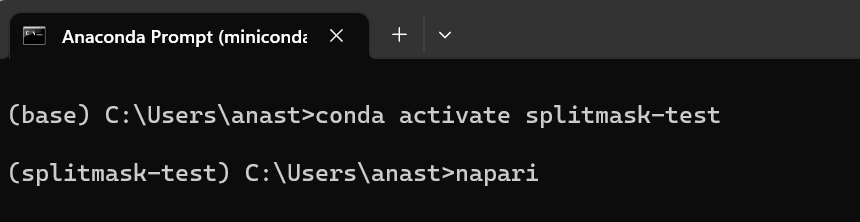

In [27]:
Image('images/anaconda_Prompt.png')

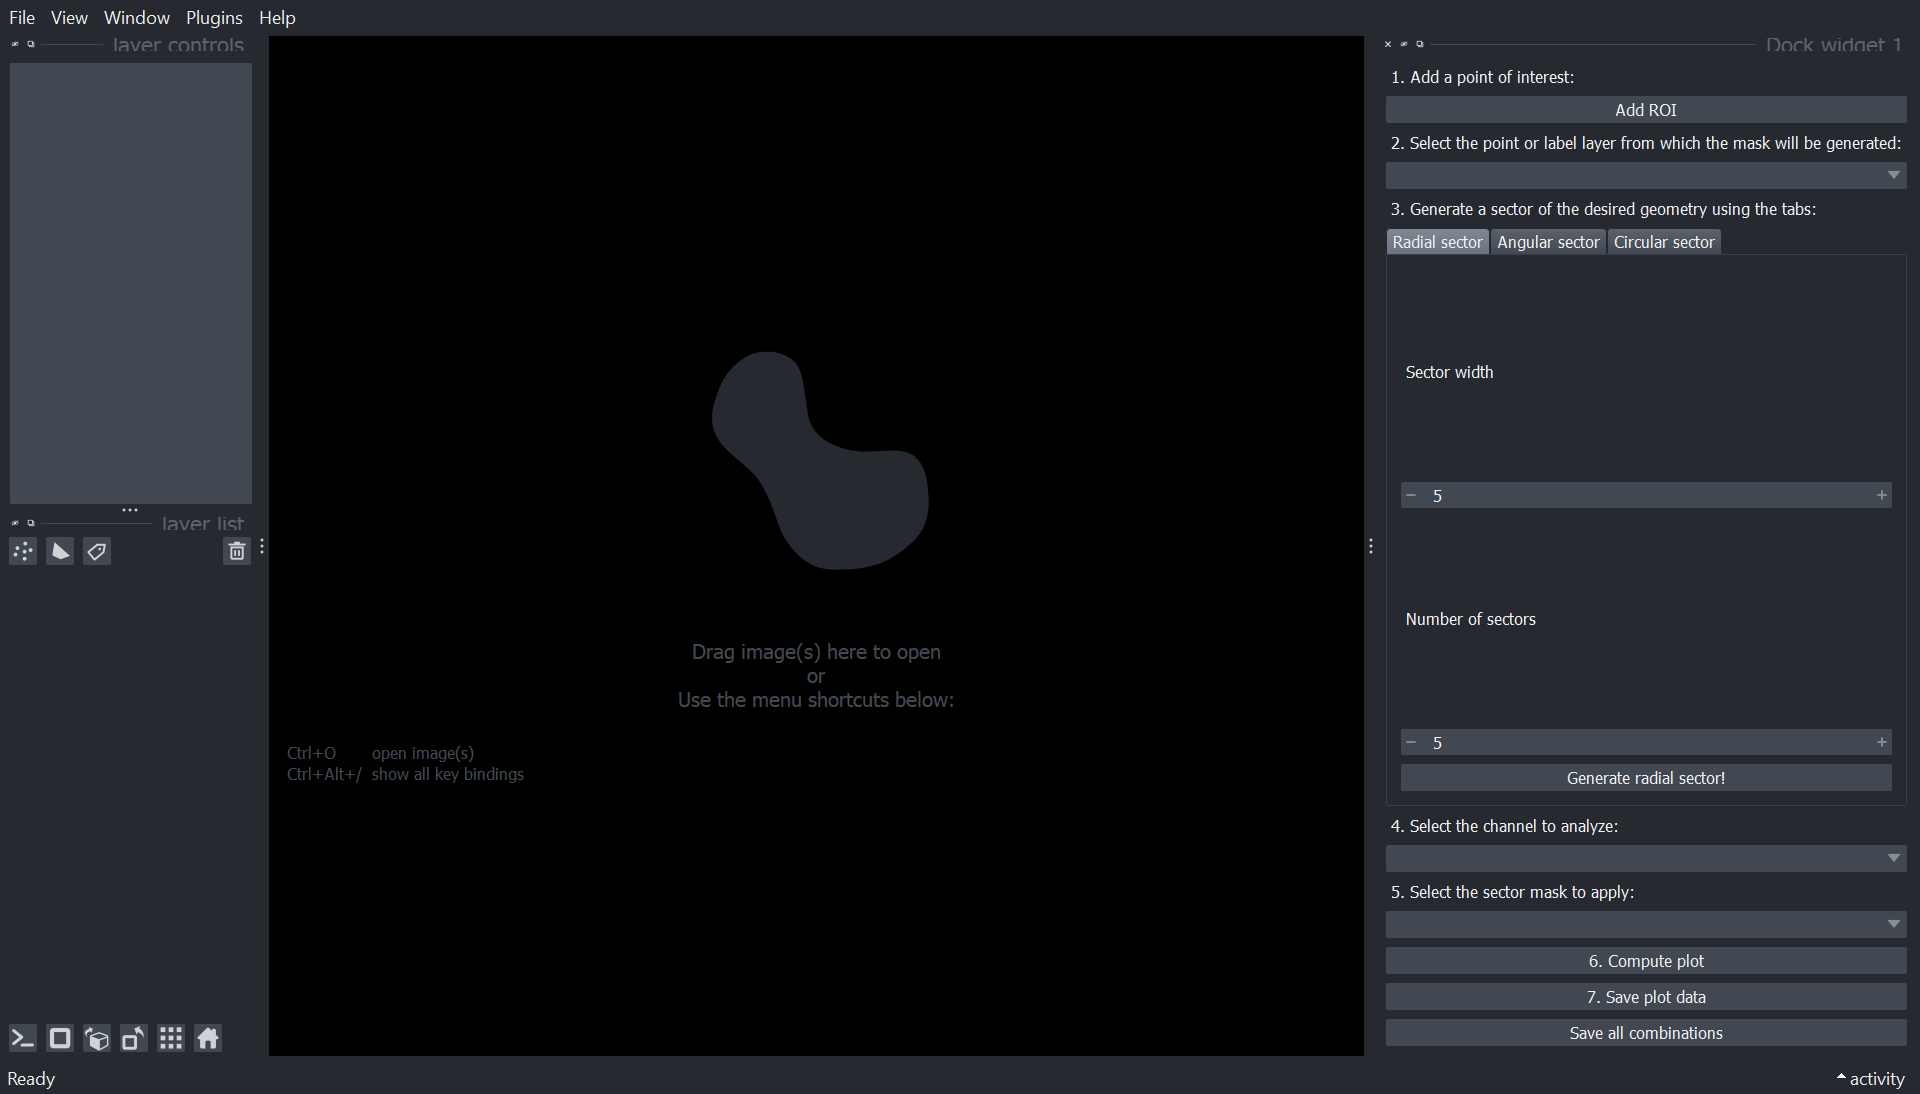

In [14]:
nbscreenshot(viewer)

Drag-and-drop the images that you wamt to analyze. The image should be a time-lapse. If you have many channels, import the different channels as single time-lapse images.

```{warning}
The image should not contain 'mask' in its name, because this is a filtering criterion to import them in the different drop-down menus. If this is the case, you can rename the images directly in napari for the analysis.
```

## 1. Add a point of interest
To add the point of interest you have two different options:

- You can manually add a point of interest using the 'Add ROI' button. This will create a point layer in napari called 'point of interest'. You can now add a point where you want the roidynamics to be generated.

- Alternatively, if you have already a label image, you can drag-and-drop it in napari together with the images to analyze.<br/>
*In this case, roidynamics will calculate a center of mass for your label, and use it as the coordinates to generate the roidynamics geometry.*

```{warning}
Make sure that the label image is imported correctly as label. If this is not the case you can right-click on the image, and select the option "Convert to Labels"

```



## 2. Select the point or label layer from which the mask will be generated:
Even if you have a label, maybe you have decided to add a point of interest manually, so here is the option where you have to decide, which layer will be used to generate the roidynamics. Select from the drop down menu.

## 3. Generate a sector of the desired geometry using the tabs:
Depending on what geometry you want to generate, there are different parameters that you have to set. This is why the roidynamics geometries are are displayed on different tabs. You can also decide to generate different geometries. When you hit the generate button napari-roidynamics will produce a label layer with the selected geometry.

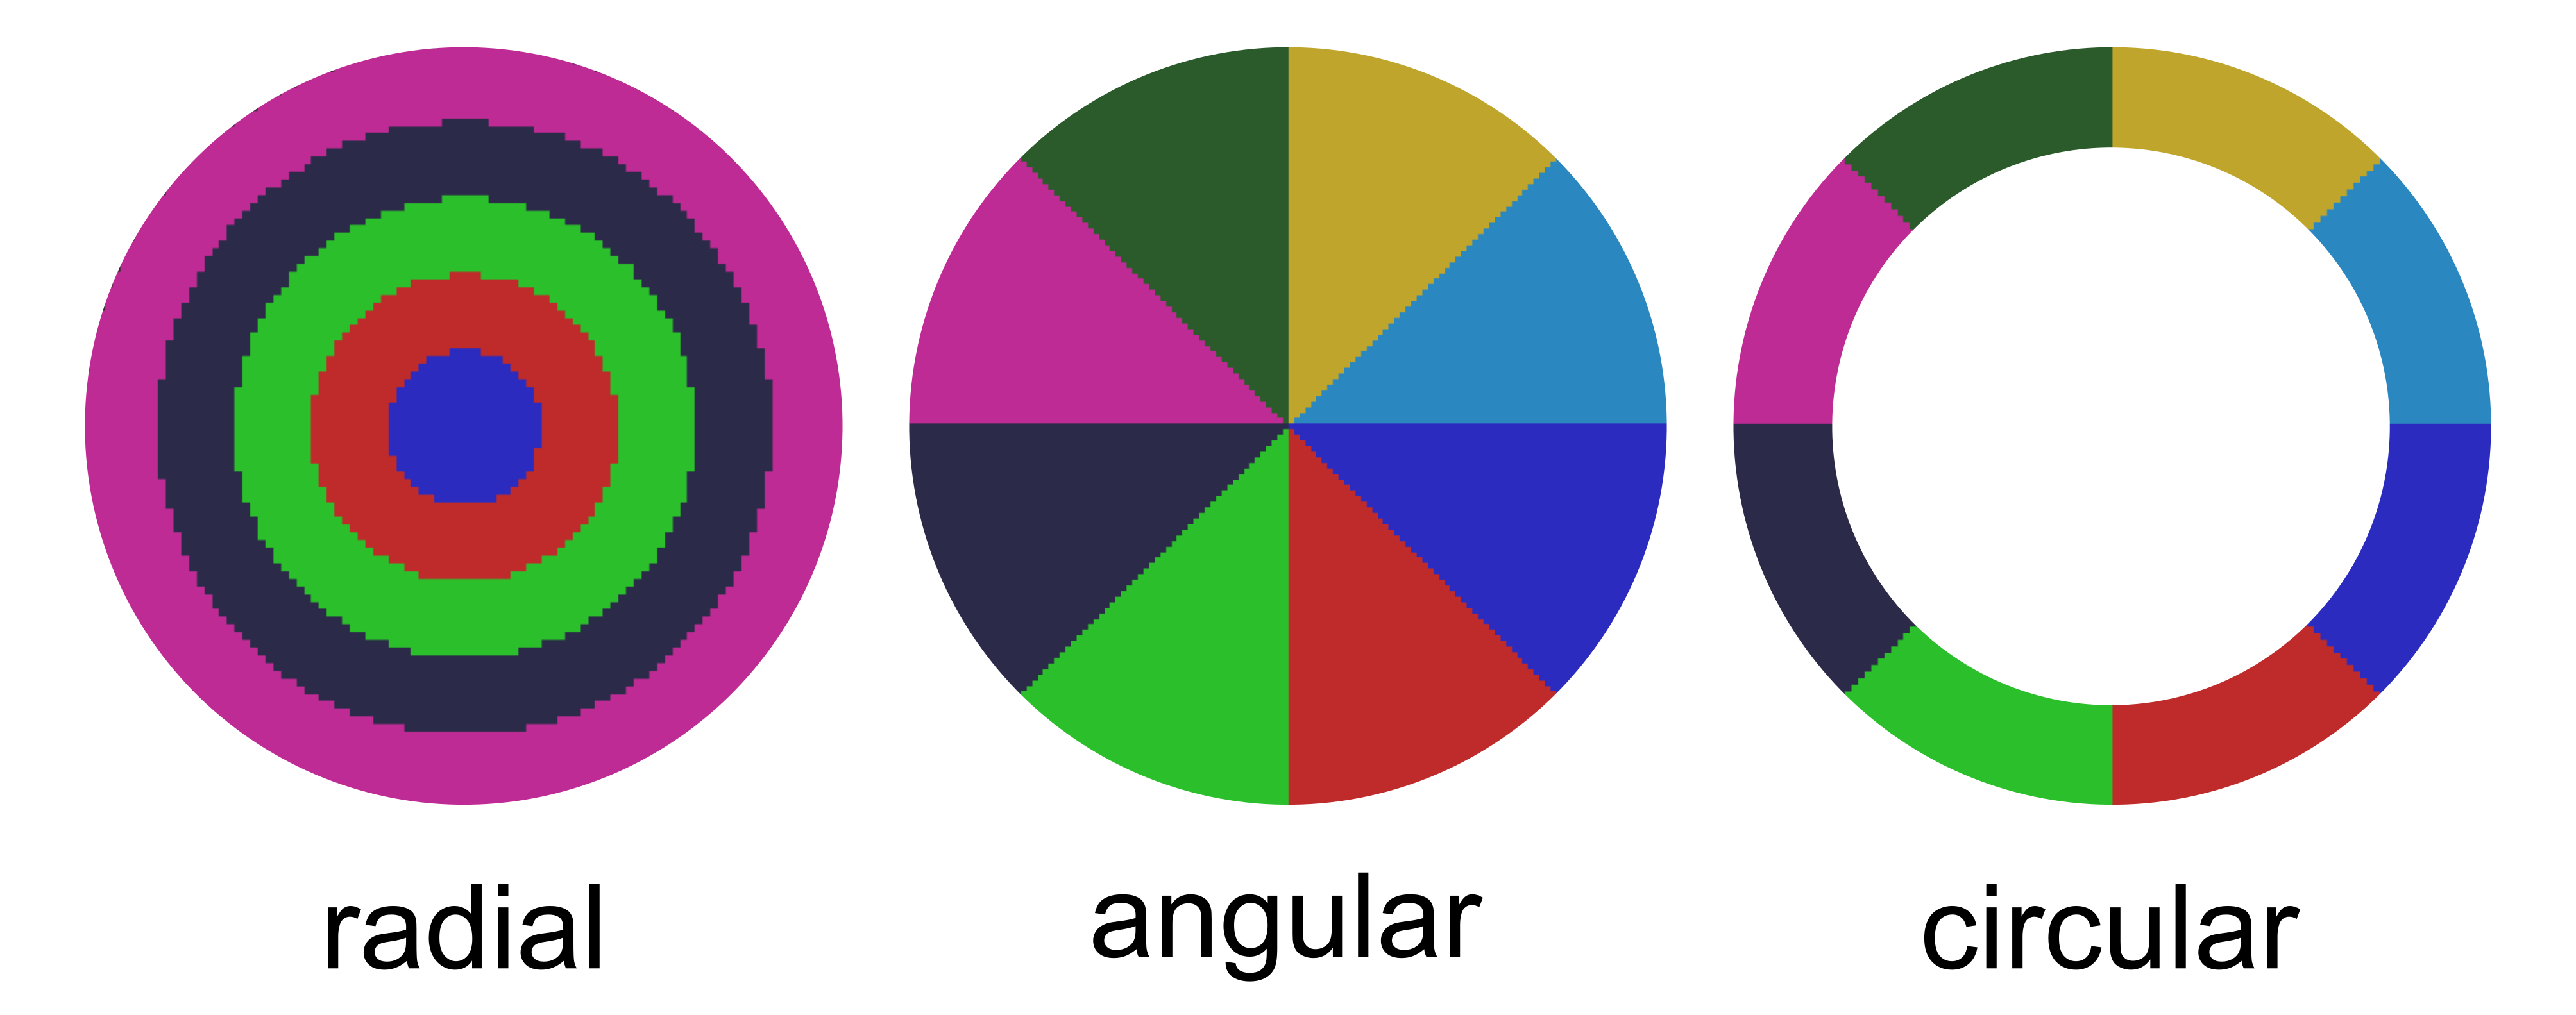

In [15]:
Image('images/napari-roidynamics_shapes.png')

### radial sector
Parameters:
- *sector width* is the radius of each sector
- *number of sectors* defines how many sectors will compose this geometry

After the selection, hit the *Generate radial sector!* button. When the mask is generated, you can adjust it using the spin buttons.


```{warning}
If the geometry doesn't update live make sure that the correct layer is selected in step 2. 
```

```{image} images/radial_sector.png
:alt: radial sector
:class: bg-primary
:width: 600px
:align: center
```

### angular sector
Parameters:
- *angle width* is represented in degrees, and its range is 1-360°
- *sector radius* is the radius of the circle that will be generated

```{warning}
The last sector will not be generated, unless 360° is a multiple of the angle width you have select.
```

```{image} images/angular_sector.png
:alt: angular sector
:class: bg-primary
:width: 600px
:align: center
```

In the following example an angle of 50° was selected, therefore only 7 complete angular sectors were generated.

```{image} images/angular_missing.png
:alt: angular sector missing
:class: bg-primary
:width: 300px
:align: center
```

### circular sector
This geometry is very similar to the angular sector but it is annular, so that you will need to setup the thickness of the generated ring. 

Parameters:
- *angle width* is represented in degrees, and its range is 1-360°
- *sector radius* is the radius of the circle that will be generated
- *ring width* determines the thickness of the ring

## 4. Select the channel to analyze:
If you have imported different image channels to analyze, here you have to input on which image you want to apply the roidynamics intensity measurements.

## 5. Select the sector mask to apply:
In step 5, you might have generated different sectors, therefore here you need to select which mask will be used to calculate the intensities. 

```{warning}
Here is where the 'mask' filtering is applied, your mask will be displayed in this drop-down menu, only if it contains the word 'mask'. Please, even if you decide to rename this layer, keep the word "mask" in the new name.
```

## 6. Compute plot
This function will generate a line plot in a separate window, with the time points on the x-axis and the intensity of the different sectors on the y-axis.
The colors of the lines corresponds to the colors of the sectors.

## 7. Save plot data
Use this option to save the generated data, you will be asked to select a folder to export the saved results. The saving automatically includes:
- the .csv file of the plot data
- the mask geometry used for the measurements. This can later be reimported as a label layer in napari
- the screenshot of the napari viewer main window, so that you can document the overlap of the mask and the analyzed images.

## Save all combinations

This is an optional step that allows you to measure automatically the intensities in all the channels that you have loaded (listed in step 4), applying all the geometries that you have generated (listed in step 5).